# Pandas: grouping

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import missingno as msno

In [236]:
cars = pd.read_csv("data/vehicles.csv")

In [237]:
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


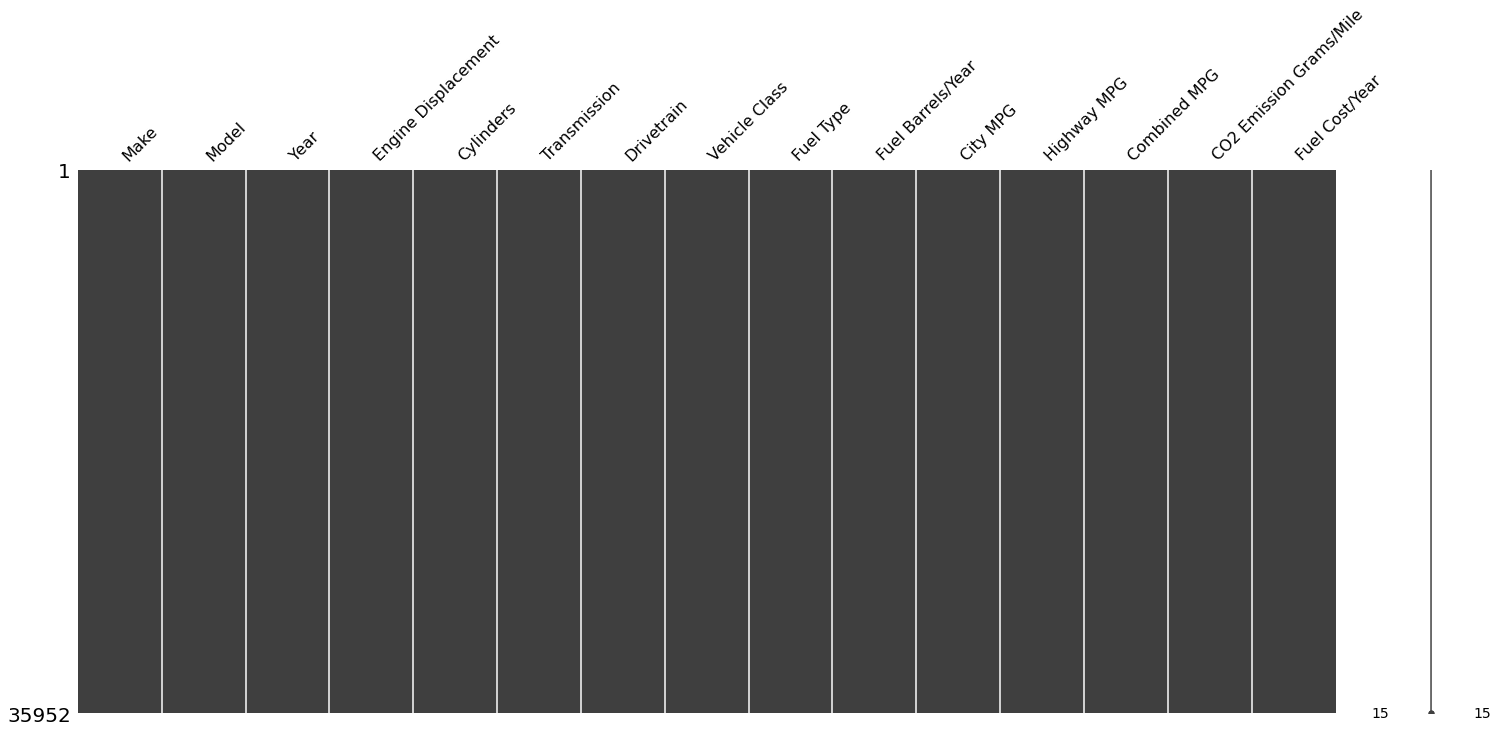

In [238]:
#This plot indicates missing values
msno.matrix(cars)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

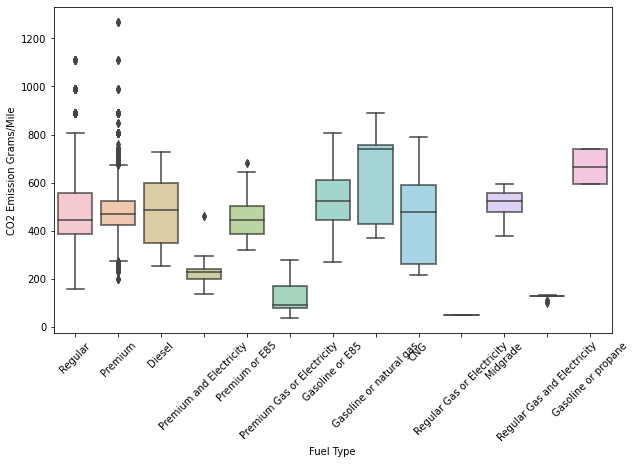

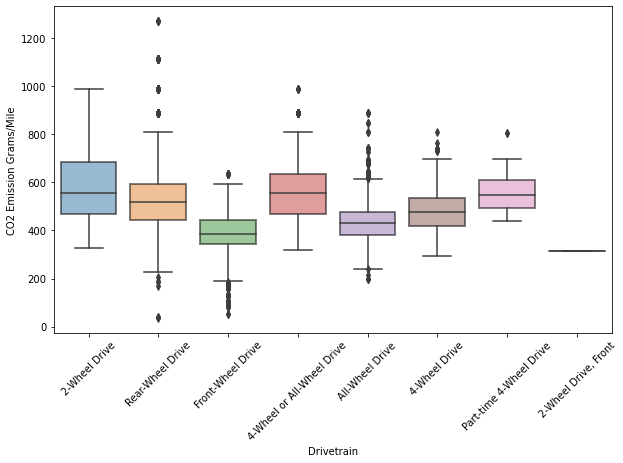

In [239]:
###WORK CO2/ Fuel Type
#cars['Fuel Type'].unique()

#fig, ax = plt.subplots(1,1,figsize=(16, 6))
#sns.kdeplot(file[file['gender']=='f']['total_claim_amount'], color='purple', ax=ax, label='female')
#sns.kdeplot(file[file['gender']=='m']['total_claim_amount'], color='orange', ax=ax, label='male')
#plt.xticks(rotation='vertical')
#plt.legend()
#plt.show()

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Fuel Type', y='CO2 Emission Grams/Mile', data=cars)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Drivetrain', y='CO2 Emission Grams/Mile', data=cars)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

How many Car models? 

**Analysis take-away:** no missing values 

In [240]:
### your code is here
cars_Model_CO2= cars[['Model','CO2 Emission Grams/Mile']]
cars_Model_count = cars_Model_CO2.groupby('Model').count()
cars_Model_count
print("There are",len(cars_Model_count),'car models.')

There are 3608 car models.


group by the data by the Make  using count function

In [241]:
### your code us here
print("This is the count of the Make of the cars:")
cars.groupby(['Make']).agg({'Make':'count'})

This is the count of the Make of the cars:


,Make
Make,
AM General,4
ASC Incorporated,1
Acura,302
Alfa Romeo,41
American Motors Corporation,22
...,...
Volkswagen,1047
Volvo,717
Wallace Environmental,32


Converting Grams/Mile to Grams/Km

1 Mile = 1.60934 Km

Grams/Mile * Mile/Km -> Grams/Mile * 1 Mile/1.60934Km

$$ \frac{Grams}{Mile} * \frac{Mile}{Km} $$

$$ \frac{Grams}{Mile} * \frac{1 Mile}{1.60934Km}  $$

convert MPG columns to km_per_liter

MPG = Miles/Gallon -> Km/Liter

1 Mile = 1.60934 Km

1 Gallon = 3.78541 Liters

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{Km}{Miles} * \frac{Gallon}{Liters}$$

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{1.60934Km}{ 1Miles} * \frac{1 Gallon}{3.78541 Liters}$$

* ( 1.60934 / 3.78541 )


What brand has the most cars?

**This is the count of each brands:**

In [242]:
### your code us here
#grouping for Make and aggregating on the count of the Make a.k.a. Brand
cars.groupby('Make').agg({'Make':['count']})

,Make
,count
Make,
AM General,4
ASC Incorporated,1
Acura,302
Alfa Romeo,41
American Motors Corporation,22
...,...
Volkswagen,1047
Volvo,717


**This is the total number of cars:**

In [243]:
#Calculating the total amount of cars (paying attention on duplicates)
total_amount_cars = len(cars.drop_duplicates())
print(len(cars.drop_duplicates()),"cars")

35952 cars


**Therefore the brand with the most cars is:**

In [244]:
cars_brand_ratio = cars.groupby('Make')['Make'].apply(lambda grps:grps.count()/total_amount_cars*100)

df_cars_brand_ratio = cars_brand_ratio.to_frame()

cars_brand_ratio_sorted = df_cars_brand_ratio['Make'].sort_values(ascending=False)

df_cars_brand_ratio_sorted = cars_brand_ratio_sorted.to_frame()

print("Chevrolet has the biggest share with 10.13% of cars in this vehicles dataset")
df_cars_brand_ratio_sorted

Chevrolet has the biggest share with 10.13% of cars in this vehicles dataset


,Make
Make,
Chevrolet,10.132955
Ford,8.194259
Dodge,6.564308
GMC,6.528149
Toyota,5.106809
...,...
Excalibur Autos,0.002781
S and S Coach Company E.p. Dutton,0.002781
Environmental Rsch and Devp Corp,0.002781


<b>show the average CO2_Emission_Grams/Km  by Brand

In [245]:
### your code us here
print("This is the average CO2 Emission Grams/Mile by brand:")

This is the average CO2 Emission Grams/Mile by brand:


In [246]:
cars.groupby("Make")["CO2 Emission Grams/Mile"].apply(lambda grps:grps.mean()/(1.60934))

Make
AM General                     379.881345
ASC Incorporated               345.133719
Acura                          262.583000
Alfa Romeo                     288.287195
American Motors Corporation    314.264744
                                  ...    
Volkswagen                     244.038998
Volvo                          270.796572
Wallace Environmental          408.857065
Yugo                           221.251107
smart                          153.498052
Name: CO2 Emission Grams/Mile, Length: 127, dtype: float64

<b>show the average CO2_Emission_Grams/Km  by Brand ... sorted

**This are the average CO2 Emission Grams/Mile of the brands in vehicle dataset**

In [247]:
### your code us here
mean_CO2_brand = cars.groupby('Make').agg({'CO2 Emission Grams/Mile':['mean']})
mean_CO2_brand

,CO2 Emission Grams/Mile
,mean
Make,
AM General,611.358244
ASC Incorporated,555.437500
Acura,422.585325
Alfa Romeo,463.952115
American Motors Corporation,505.758823
...,...
Volkswagen,392.741721
Volvo,435.803755


**This are the average CO2 Emission Grams/Mile of the brands in vehicle dataset sorted by brand (literally)**

In [248]:
##sorting CO2 Emission Grams/Mile mean ascendingly by brand

mean_CO2_brand_sorted = mean_CO2_brand['CO2 Emission Grams/Mile'].sort_values(by='Make', ascending=False)

mean_CO2_brand_sorted

,mean
Make,
smart,247.030556
Yugo,356.068256
Wallace Environmental,657.990029
Volvo,435.803755
Volkswagen,392.741721
...,...
American Motors Corporation,505.758823
Alfa Romeo,463.952115
Acura,422.585325


# (Optional) 

Use `pd.cut` or `pd.qcut` to create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [249]:
cars['Year'].describe()

count    35952.00000
mean      2000.71640
std         10.08529
min       1984.00000
25%       1991.00000
50%       2001.00000
75%       2010.00000
max       2017.00000
Name: Year, dtype: float64

[NaN, (1984.0, 1991.0], (1991.0, 2001.0], (2001.0, 2010.0], (2010.0, 2017.0]]
Categories (4, interval[int64, right]): [(1984, 1991] < (1991, 2001] < (2001, 2010] < (2010, 2017]]


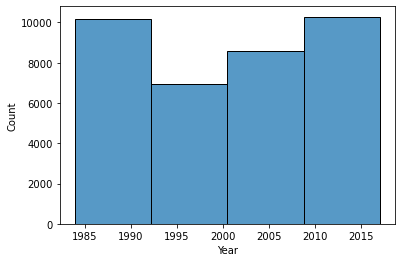

In [250]:
## your code here
cars['bins'] = pd.cut(x=cars['Year'], bins=[1984, 1991, 2001, 2010, 2017])
#print(cars)

# We can check the frequency of each bin
#cars['bins'].unique()
print(cars['bins'].unique())

sns.histplot(cars['Year'],bins=4)

### Did cars consume more gas in the eighties?

show the average City_Km/Liter by year_range

In [251]:
### your code is here
cars.groupby('Year' in range (1980,))

KeyError: False

Which brands are more environment friendly?

In [ ]:
### your code is here

Does the drivetrain affect fuel consumption?

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

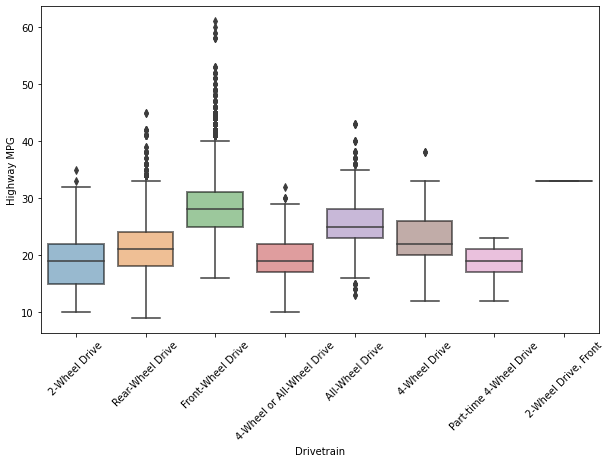

In [256]:
## Your Code here
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Drivetrain', y='Highway MPG', data=cars)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

Do cars with automatic transmission consume more fuel than cars with manual transmission?

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

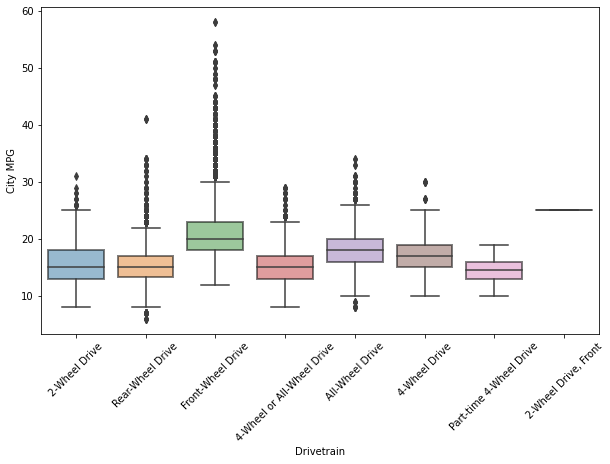

In [257]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Drivetrain', y='City MPG', data=cars)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [ ]:
## Your Code here

Use `groupby` and `agg` with different aggregation measures for different columns:

aggregate with average City_Km/Liter and the count of the Trans

In [252]:
## your code is here

aggregate with average City_Km/Liter and the minimum of the Trans

In [253]:
### your code is here